In [20]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams.update({"text.usetex": False})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
mcmcviz = viz.MCMCVisualizer("./47_tuc_binaries/NGC0104_sampler.hdf", obs)

In [4]:
civiz = mcmcviz.get_CImodel(Nprocesses=4, N=512, binary_fraction=0.02)

/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)
/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon

In [32]:
def plot_BHs(BHs):
    plt.figure()
    plt.xlabel(r"Mass in BHs [$M_{\odot}$]")
    plt.ylabel("Probability density")

    sns.histplot(x=BHs, kde=False, stat="density")

    vals = np.percentile(BHs, [16, 50, 84])
    q = np.diff(vals)
    # plt.axvline(vals[1], ls="-")
    # plt.axvline(vals[0], ls="--")
    # plt.axvline(vals[2], ls="--")

    txt = "BH Mass = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(vals[1], q[0], q[1])
    print(
        r"BH Mass [Msol]"
        + " ="
        + txt.split("=")[1].split("_")[0]
        + " (+"
        + txt.split("^")[1].split("{")[1].split("}")[0]
        + " "
        + txt.split("_")[1].split("^")[0].split("{")[1].split("}")[0]
        + ")"
    )
    print(
        f"BH mass percentiles:\n 95: {np.percentile(BHs,95)} \n 99: {np.percentile(BHs,99)}"
    )

    # plt.axvline(np.percentile(BHs, 95), ls="--")

    plt.tight_layout()
    plt.plot()
    plt.tight_layout()
    plt.savefig("BH_contours.png", dpi=300)
    
def plot_Bin_M(Bin_M):
    plt.figure()
    plt.xlabel(r"Mass in Binaries [$M_{\odot}$]")
    plt.ylabel("Probability density")

    sns.histplot(x=Bin_M, kde=False, stat="density")

    vals = np.percentile(Bin_M, [16, 50, 84])
    q = np.diff(vals)
    # plt.axvline(vals[1], ls="-")
    # plt.axvline(vals[0], ls="--")
    # plt.axvline(vals[2], ls="--")

    txt = "Binary Mass = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(vals[1], q[0], q[1])
    print(
        r"Binary Mass [Msol]"
        + " ="
        + txt.split("=")[1].split("_")[0]
        + " (+"
        + txt.split("^")[1].split("{")[1].split("}")[0]
        + " "
        + txt.split("_")[1].split("^")[0].split("{")[1].split("}")[0]
        + ")"
    )
    print(
        f"Binary mass percentiles:\n 95: {np.percentile(Bin_M,95)} \n 99: {np.percentile(Bin_M,99)}"
    )

    # plt.axvline(np.percentile(BHs, 95), ls="--")

    plt.tight_layout()
    plt.plot()
    plt.tight_layout()
    plt.savefig("Binary_contours.png", dpi=300)




def plot_N_BHs(N_BHs):
    plt.figure()
    plt.xlabel(r"Number of BHs")
    plt.ylabel("Probability density")

    sns.histplot(x=N_BHs, kde=False, stat="density")

    print(
        f"BH Number percentiles:\n 95: {np.percentile(N_BHs,95)} \n 99: {np.percentile(N_BHs,99)}"
    )
    vals = np.percentile(N_BHs, [16, 50, 84])
    q = np.diff(vals)
    txt = "BH Number = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(vals[1], q[0], q[1])
    print(
        r"BH Number "
        + " ="
        + txt.split("=")[1].split("_")[0]
        + " (+"
        + txt.split("^")[1].split("{")[1].split("}")[0]
        + " "
        + txt.split("_")[1].split("^")[0].split("{")[1].split("}")[0]
        + ")"
    )

    plt.plot()
    plt.tight_layout()
    plt.savefig("BH_N_contours.png", dpi=300)

BH Mass [Msol] = 30.283 solMass (+120.823 solMass -30.283 solMass)
BH mass percentiles:
 95: 255.00287893312415 solMass 
 99: 362.18596286339425 solMass


<Figure size 720x576 with 0 Axes>

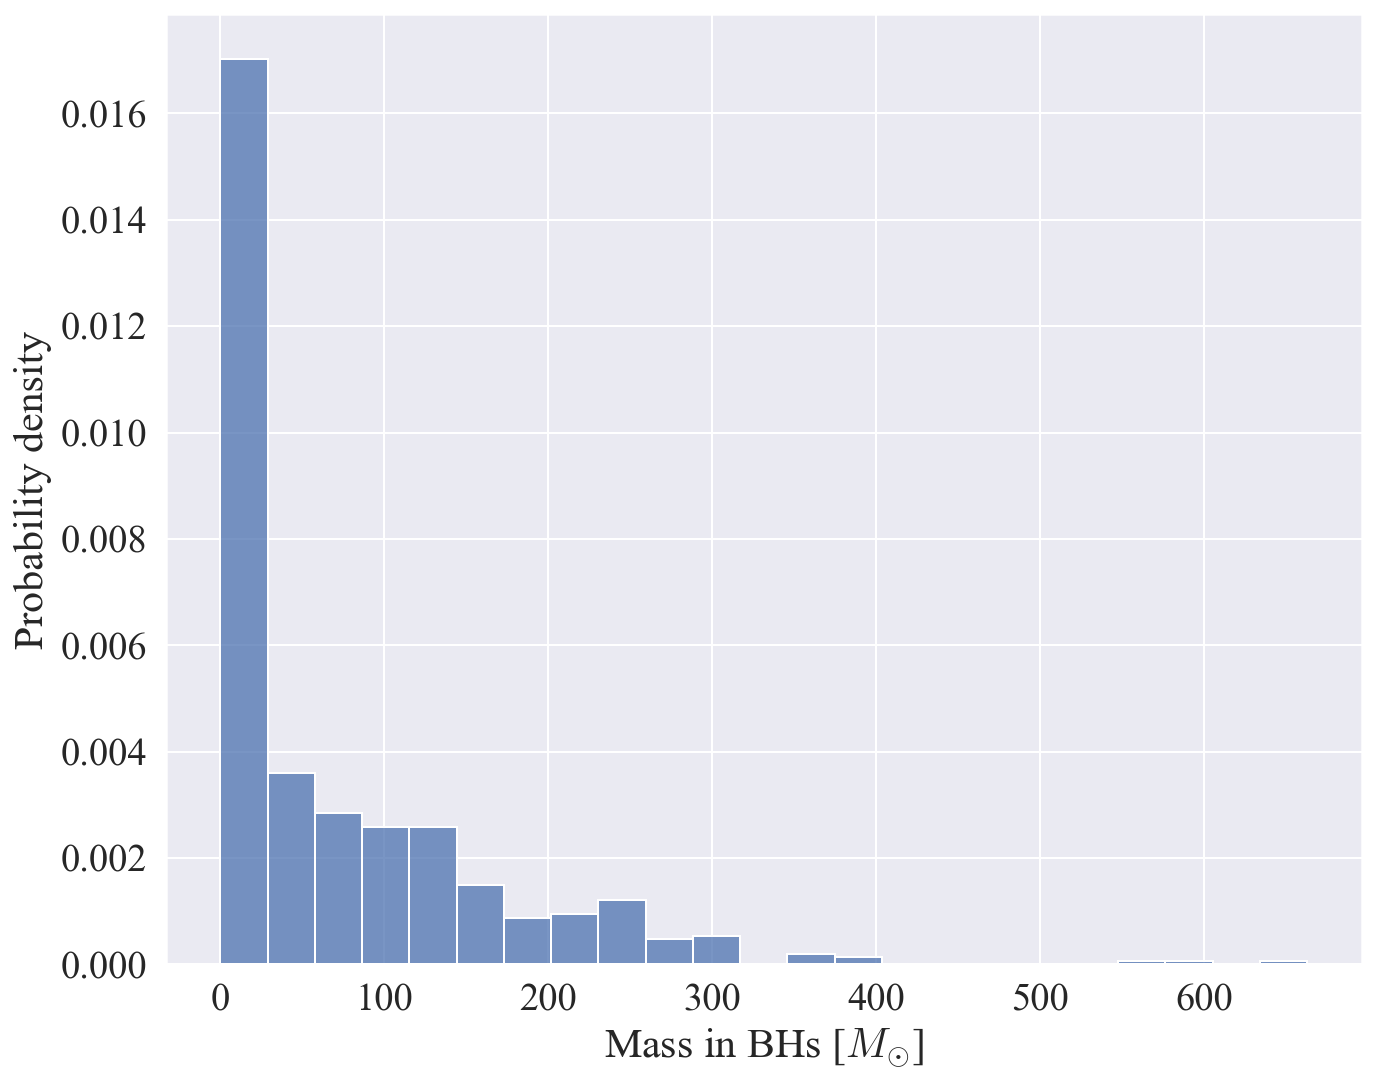

In [33]:
# plot BH Mass
fig = plt.figure(figsize=(10, 8))
plot_BHs(civiz.BH_mass)

BH Number percentiles:
 95: 29.856440339003687 
 99: 40.26816643185474
BH Number  = 4.298 (+14.608 -4.298)


<Figure size 720x576 with 0 Axes>

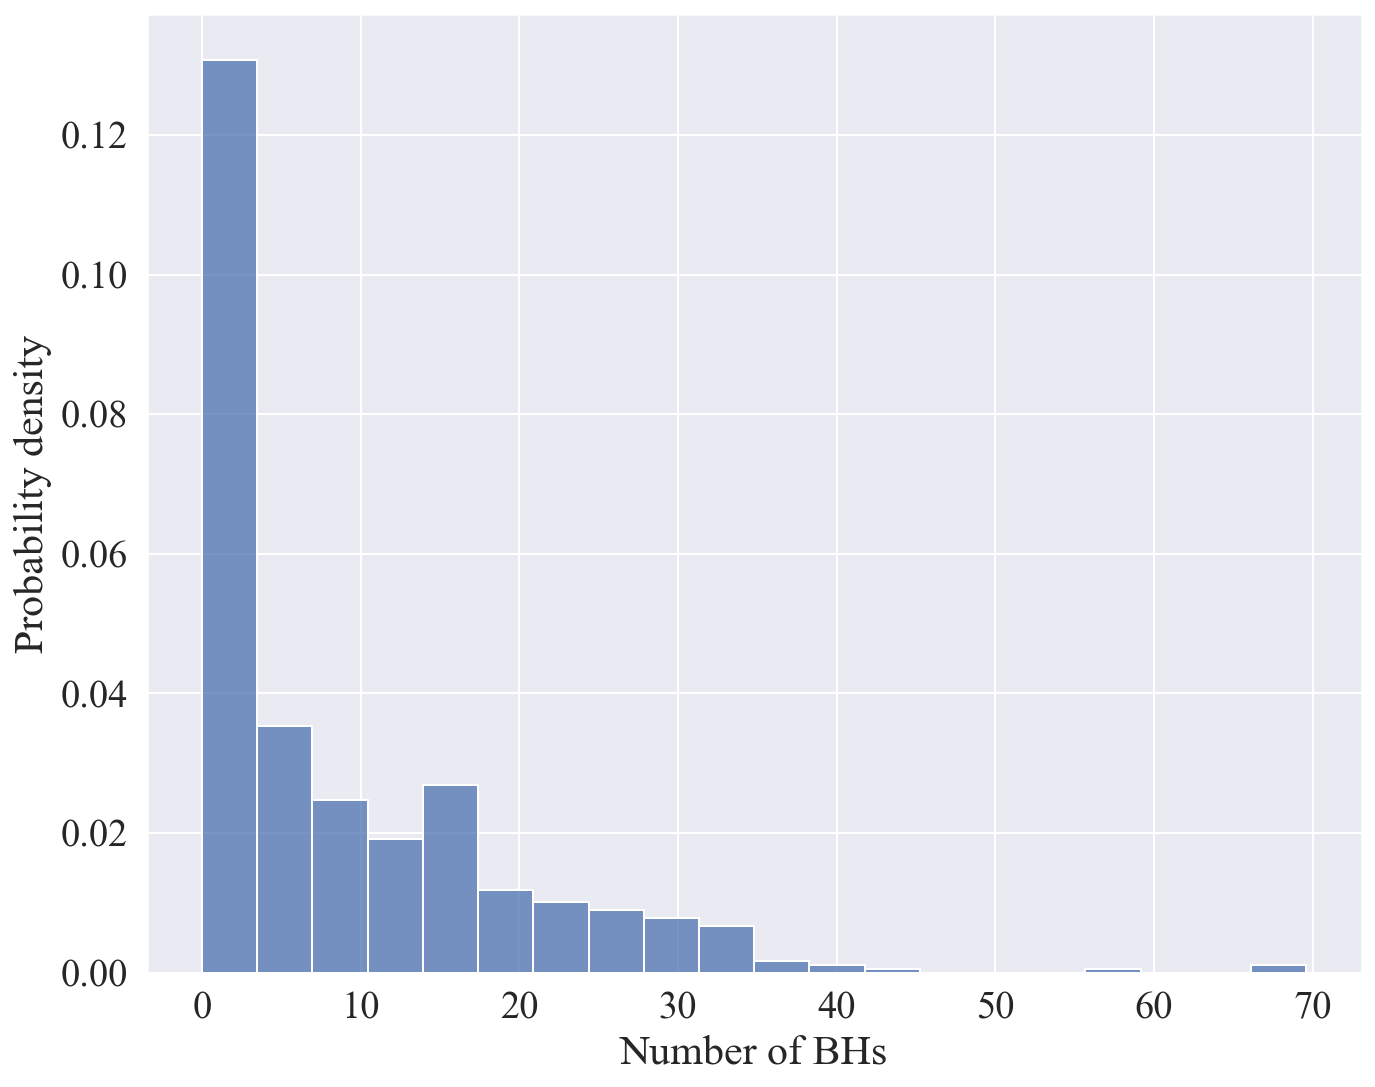

In [34]:
# plot Number
fig = plt.figure(figsize=(10, 8))
plot_N_BHs(civiz.BH_num)

Binary Mass [Msol] = 15198.710 solMass (+135.784 solMass -141.934 solMass)
Binary mass percentiles:
 95: 15411.590484498343 solMass 
 99: 15479.397792108777 solMass


<Figure size 720x576 with 0 Axes>

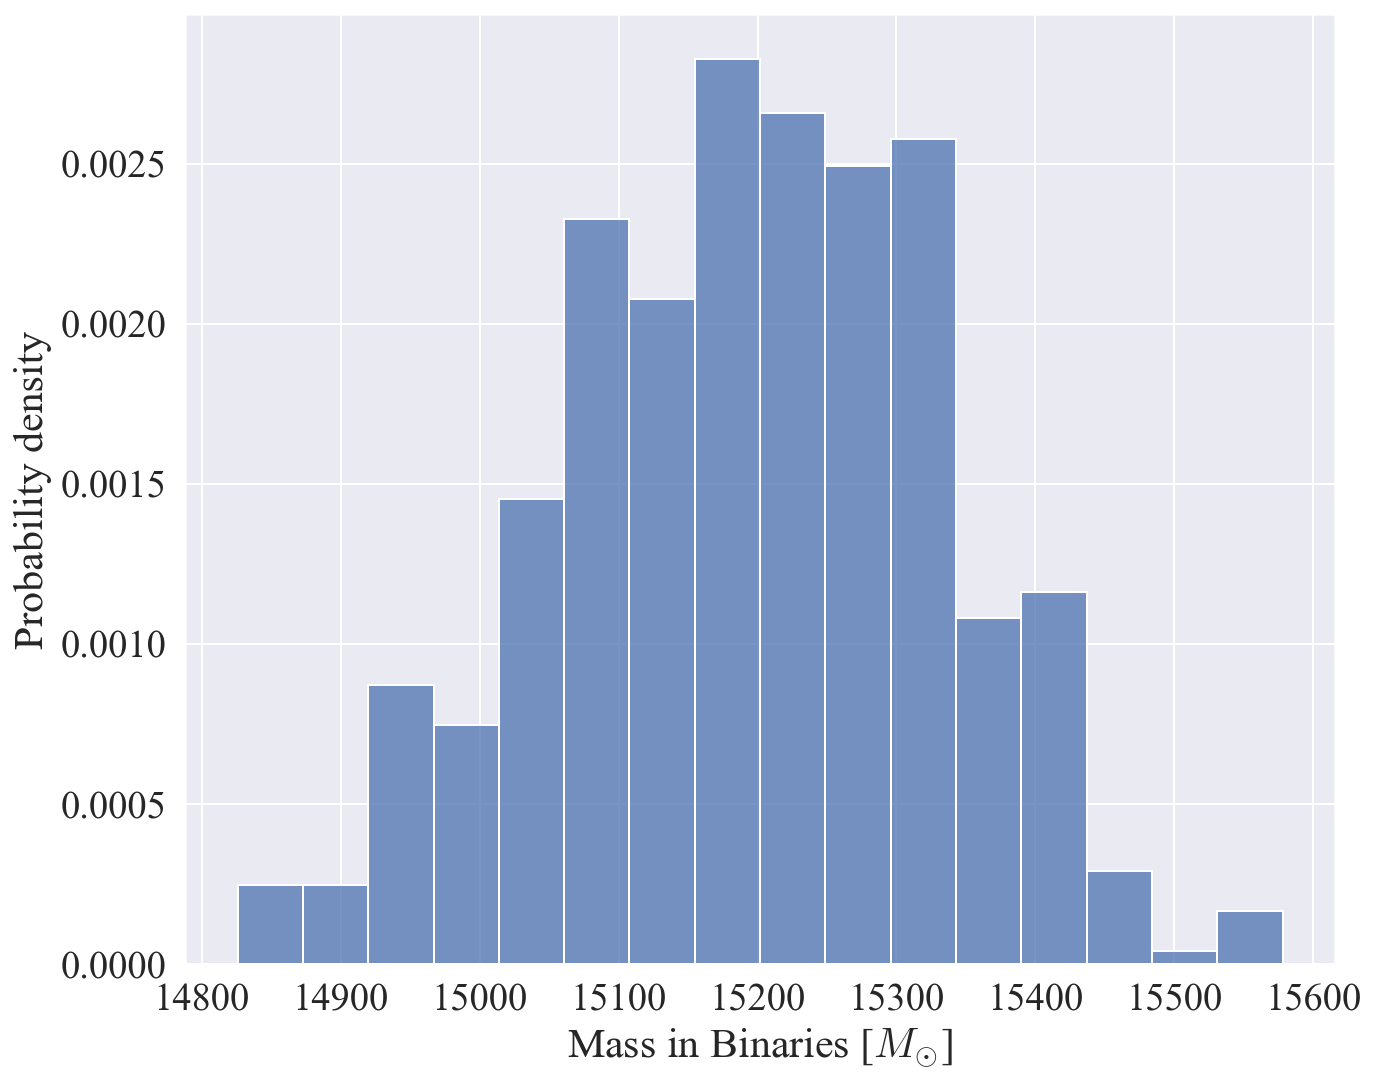

In [35]:
# plot Binary Mass
fig = plt.figure(figsize=(10, 8))
plot_Bin_M(civiz.Bin_mass)

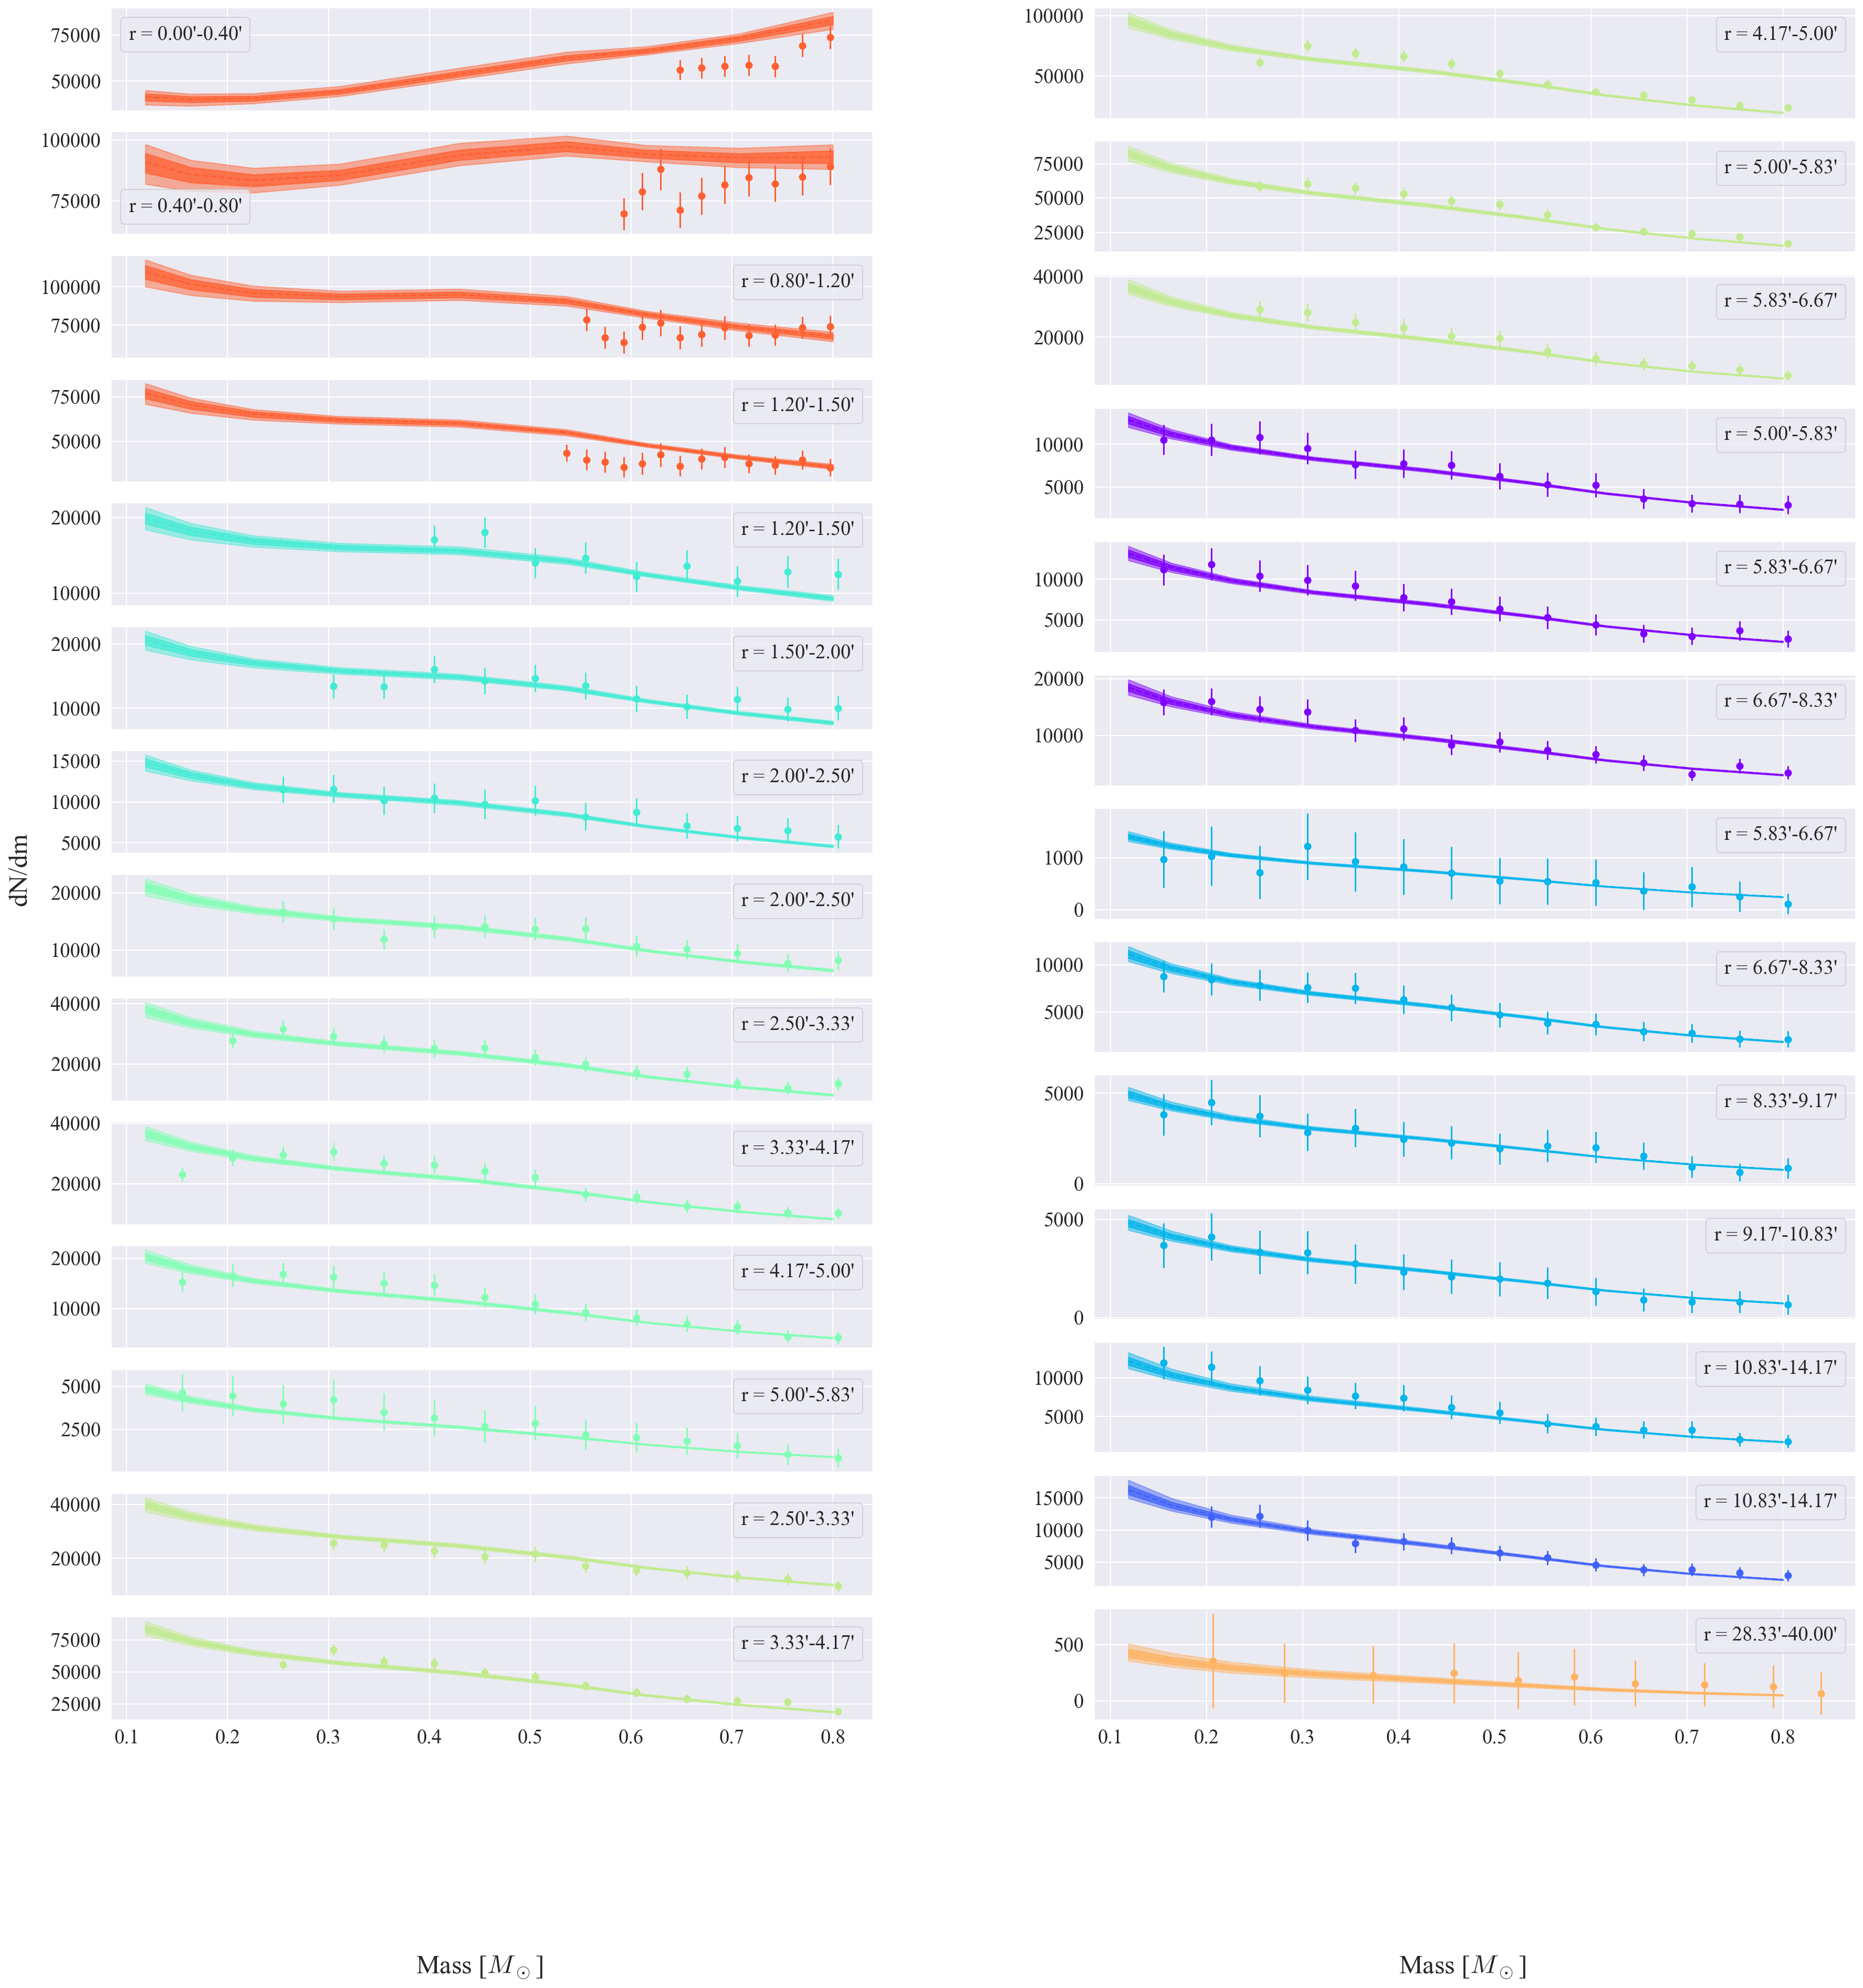

In [36]:
# plot mass function
fig = plt.figure(figsize=(26, 30))
civiz.plot_mass_func(fig=fig, rescaled=True)
# for a in fig.axes:
#     a.set_yscale("log")
#     a.set_xscale("log")
fig.savefig('mass_fun.png', bbox_inches='tight', dpi=300)
plt.show()

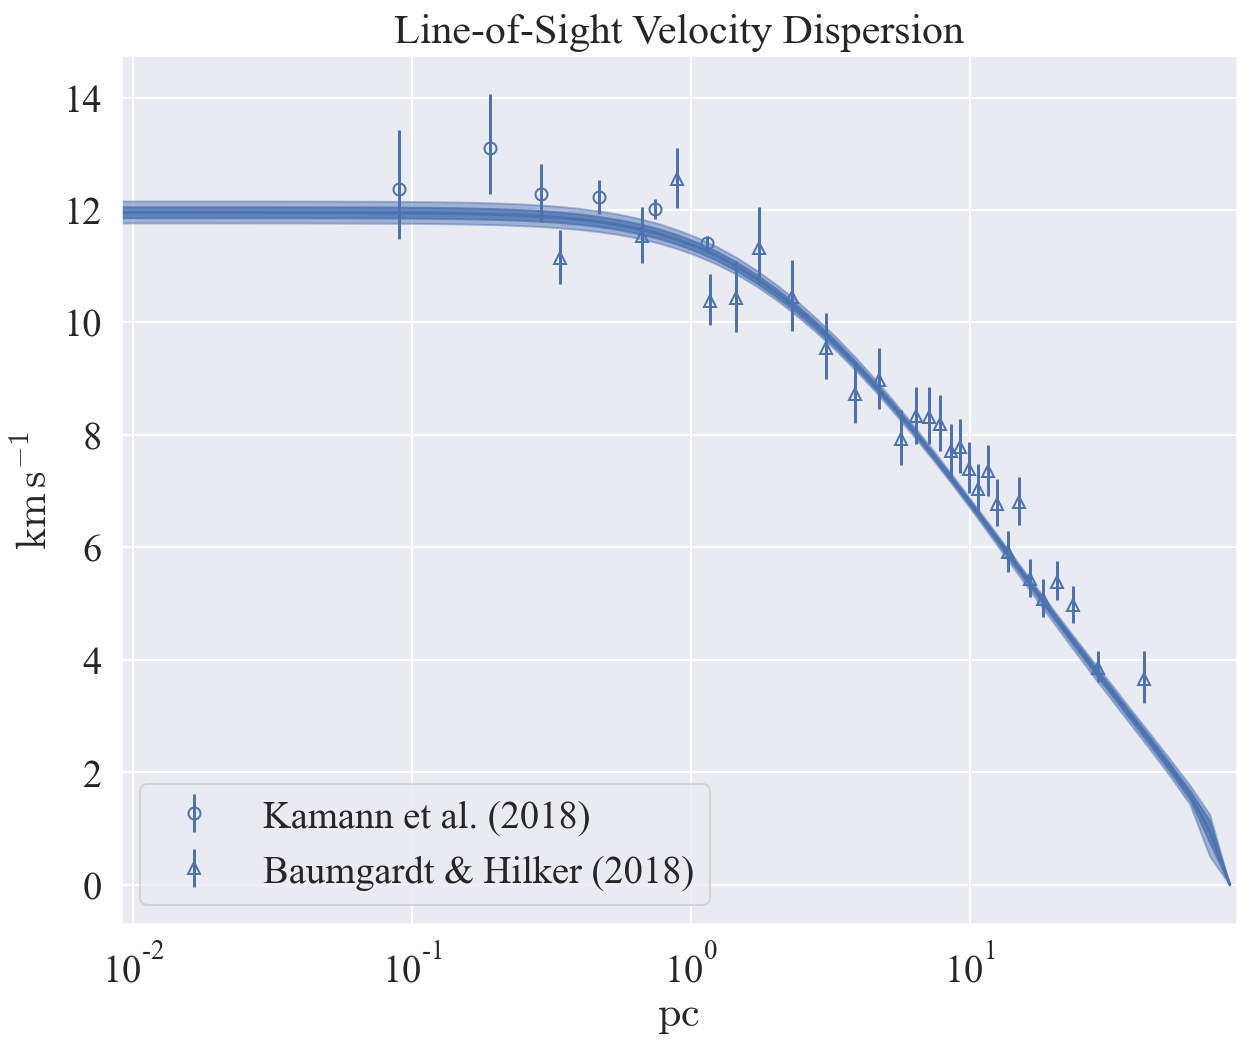

In [37]:
# plot los vdisp
fig = plt.figure(figsize=(10, 8))
civiz.plot_LOS(fig=fig)
# fig.savefig('LOS_veldisp.png', bbox_inches='tight', dpi=300)
plt.show()

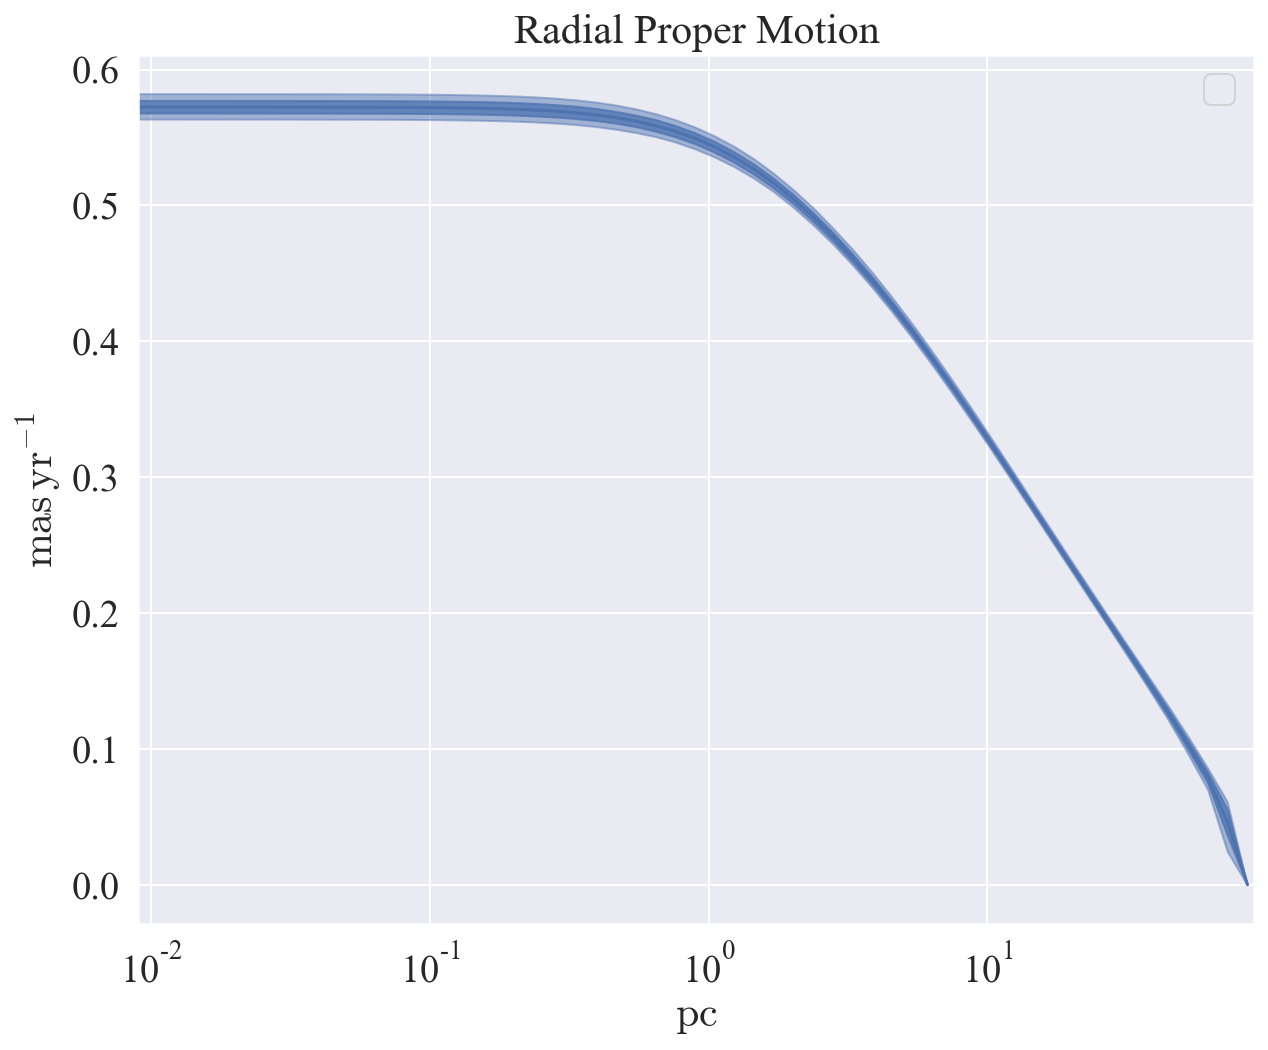

In [38]:
# plot pm R
fig = plt.figure(figsize=(10, 8))
civiz.plot_pm_R(fig=fig)
fig.savefig('PM_r.png', bbox_inches='tight', dpi=300)
plt.show()

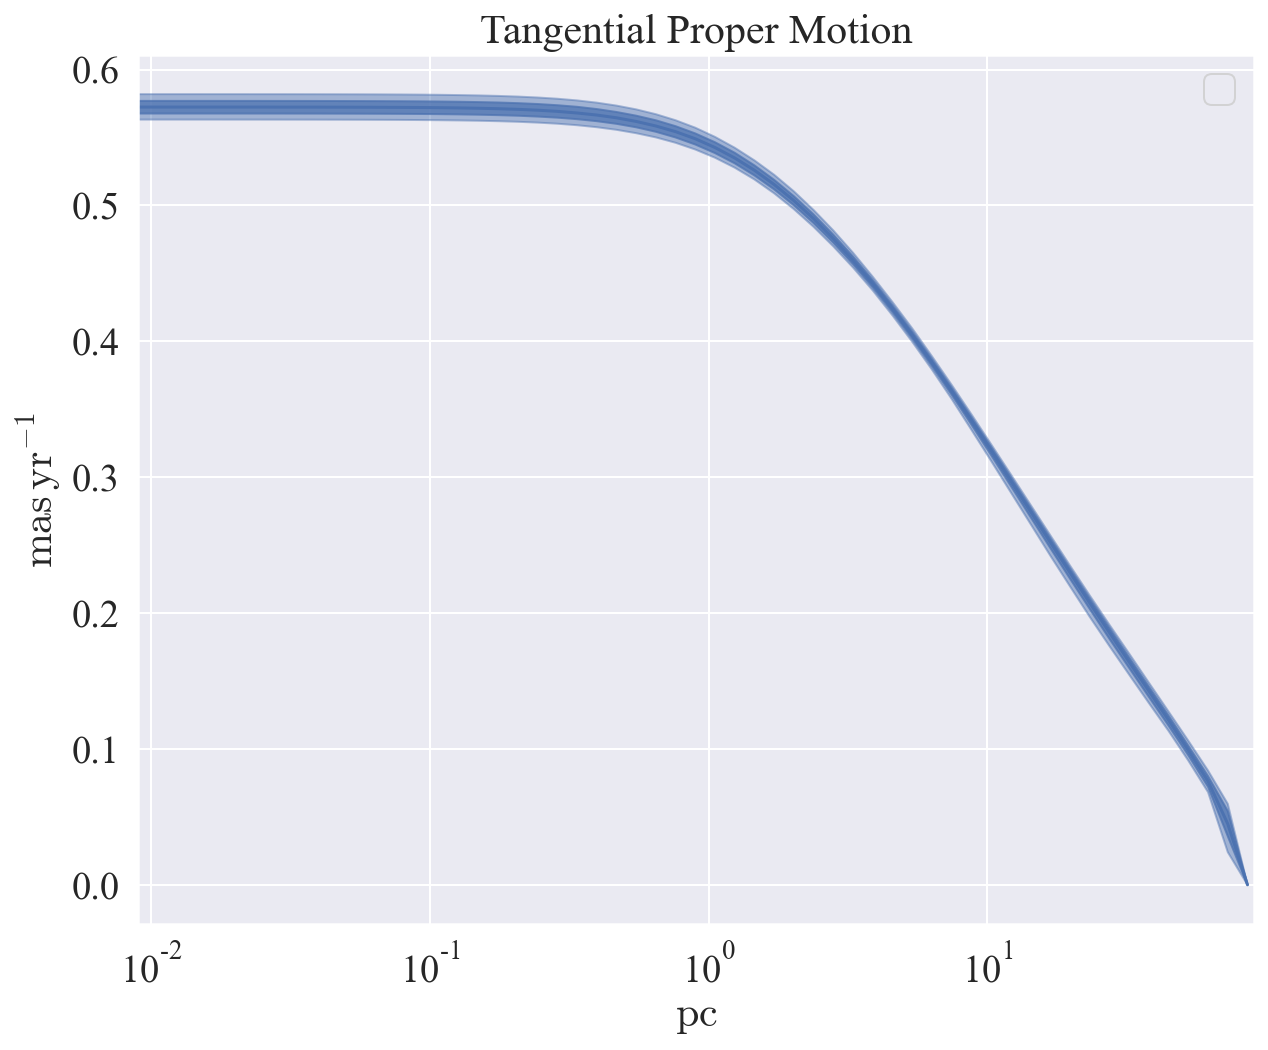

In [39]:
# plot pm T
fig = plt.figure(figsize=(10, 8))
civiz.plot_pm_T(fig=fig)
fig.savefig('PM_t.png', bbox_inches='tight', dpi=300)

plt.show()

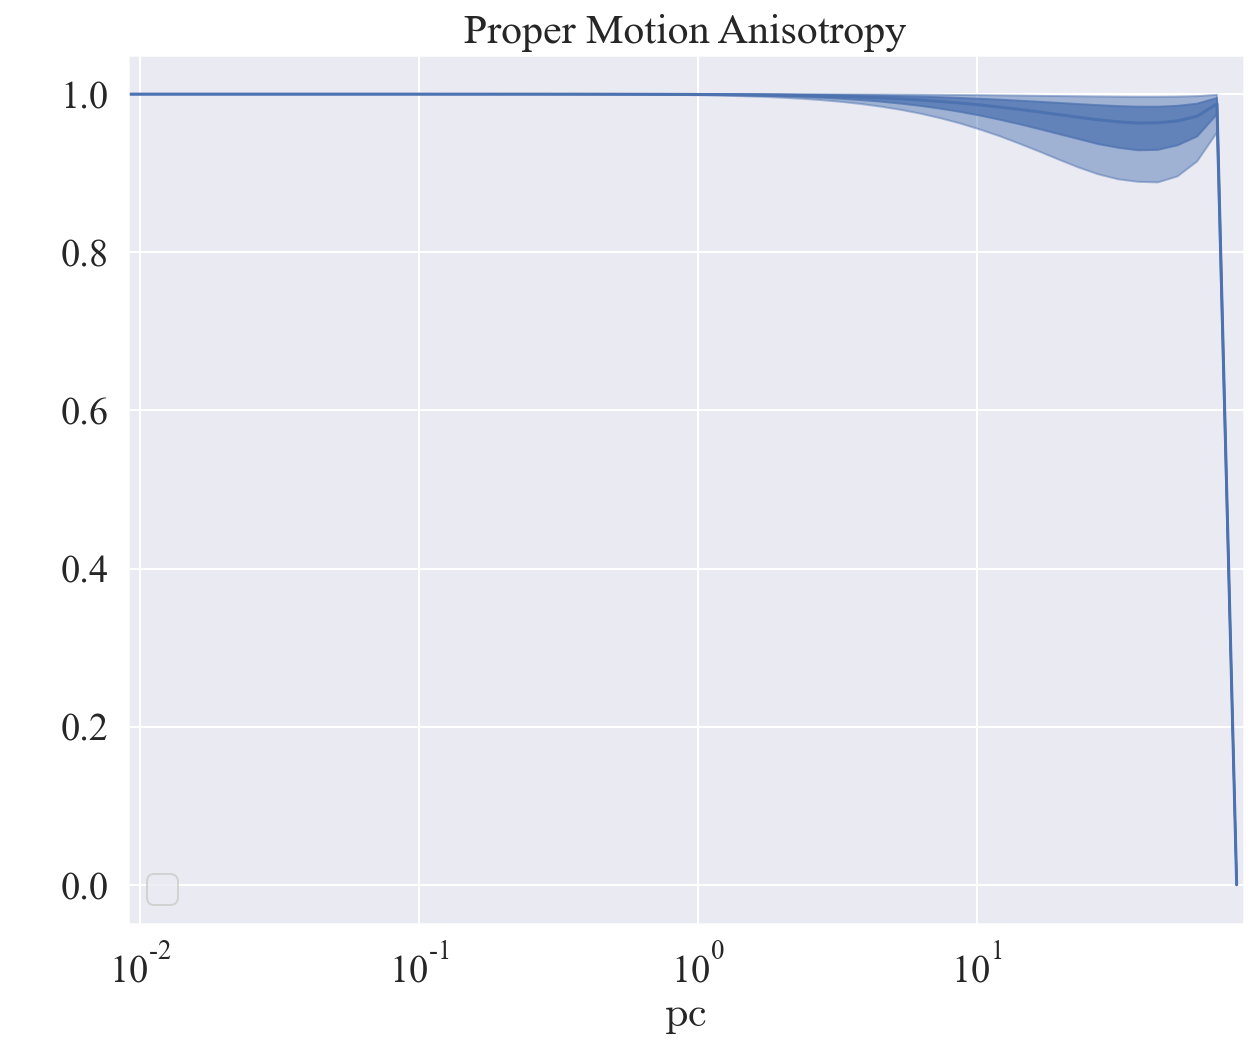

In [40]:
# plot pm ratio
fig = plt.figure(figsize=(10, 8))
civiz.plot_pm_ratio(fig=fig)
fig.savefig('PM_ratio.png', bbox_inches='tight', dpi=300)
plt.show()

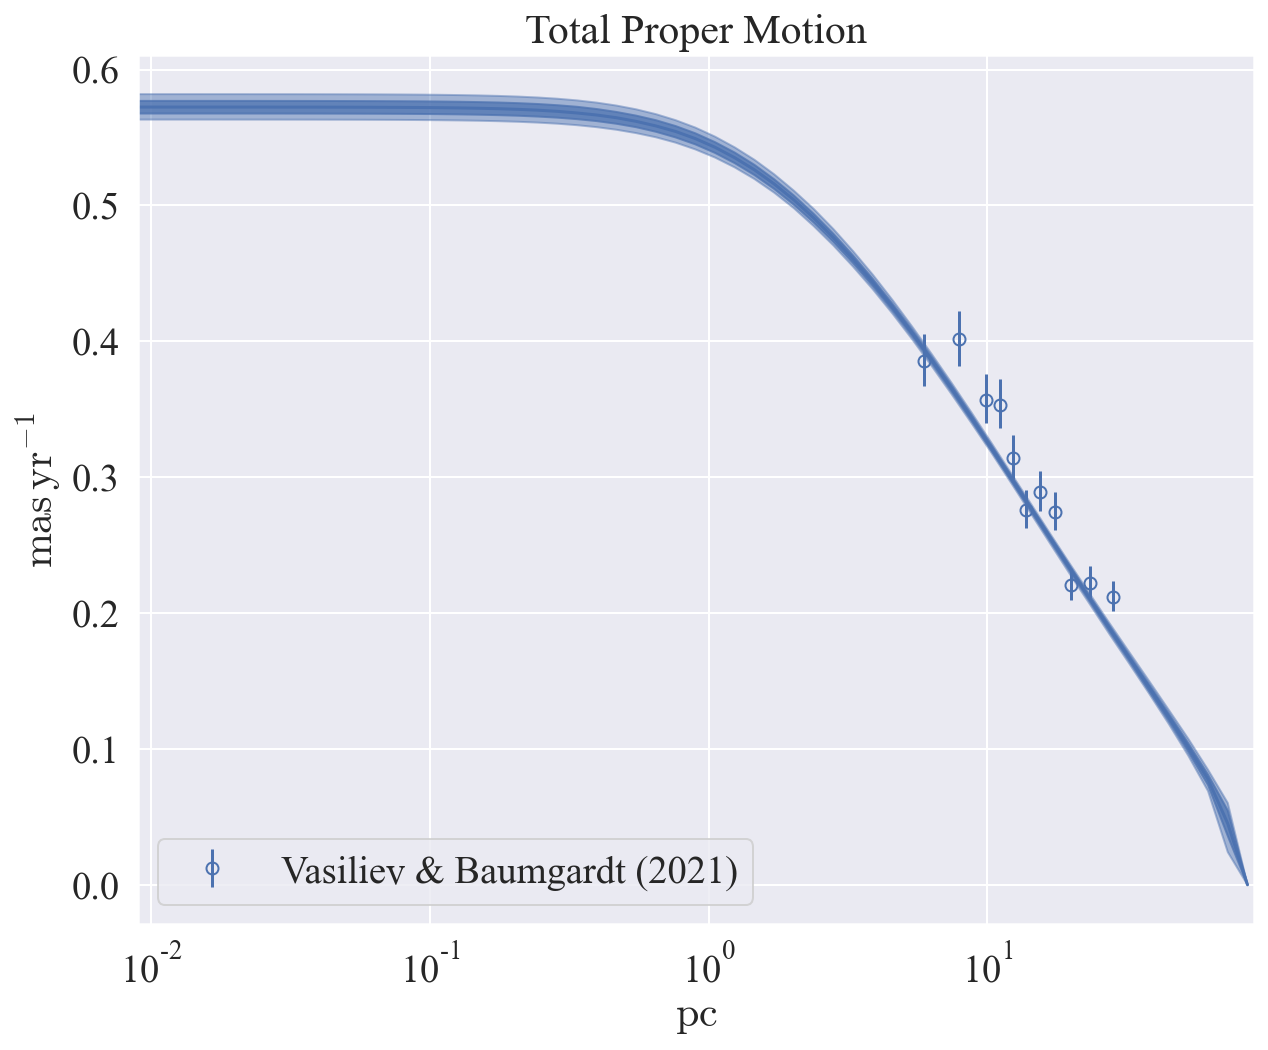

In [41]:
# plot pm total
fig = plt.figure(figsize=(10, 8))
civiz.plot_pm_tot(fig=fig)
fig.savefig('PM_tot.png', bbox_inches='tight', dpi=300)
plt.show()

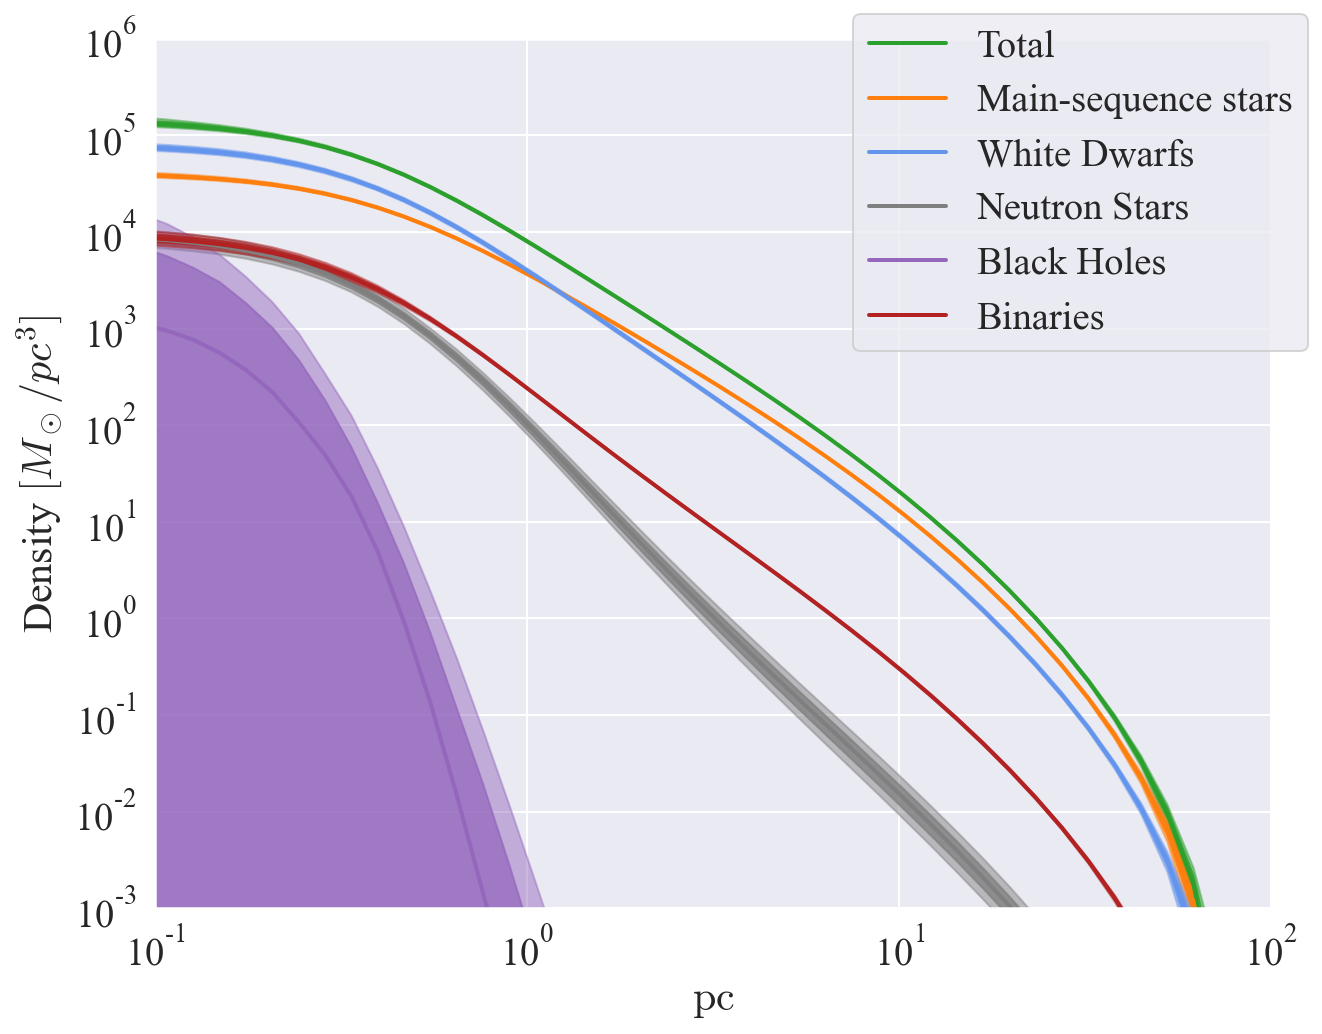

In [42]:
# plot density
fig = plt.figure(figsize=(10, 8))
civiz.plot_density(fig=fig, binaries=True)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)

fig.savefig('density.png', bbox_inches='tight', dpi=300)


plt.show()

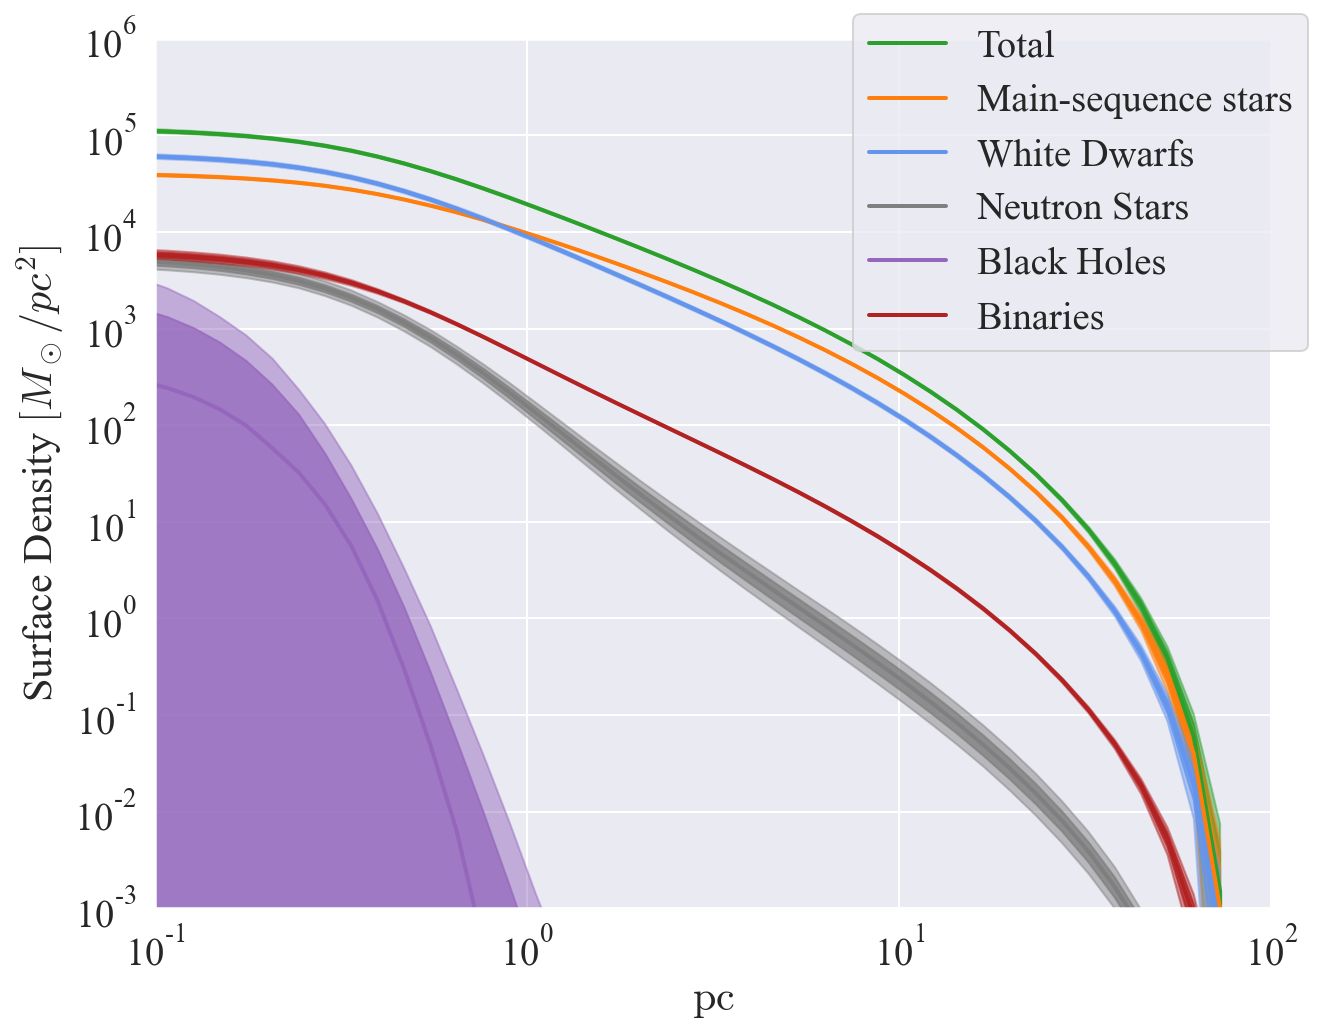

In [43]:
# plot surface density
fig = plt.figure(figsize=(10, 8))
civiz.plot_surface_density(fig=fig, binaries=True)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)

fig.savefig('surface_dens.png', bbox_inches='tight', dpi=300)


plt.show()

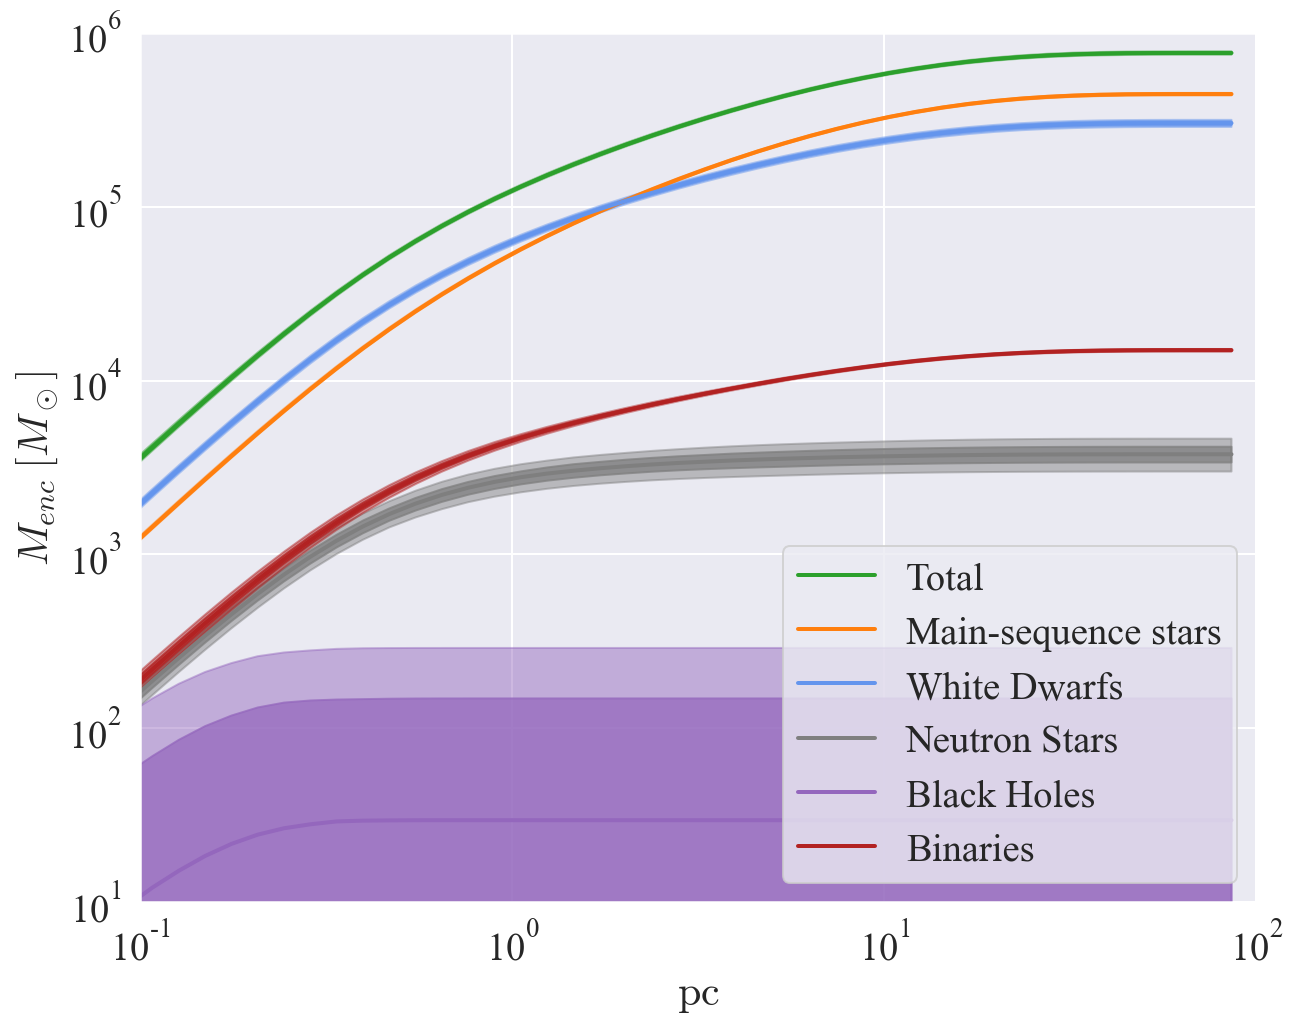

In [44]:
# plot enclosed mass
fig = plt.figure(figsize=(10, 8))
civiz.plot_cumulative_mass(fig=fig, binaries=True)

plt.legend(loc="lower right")
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e1, 1e6)

fig.savefig('mass_enc.png', bbox_inches='tight', dpi=300)


plt.show()

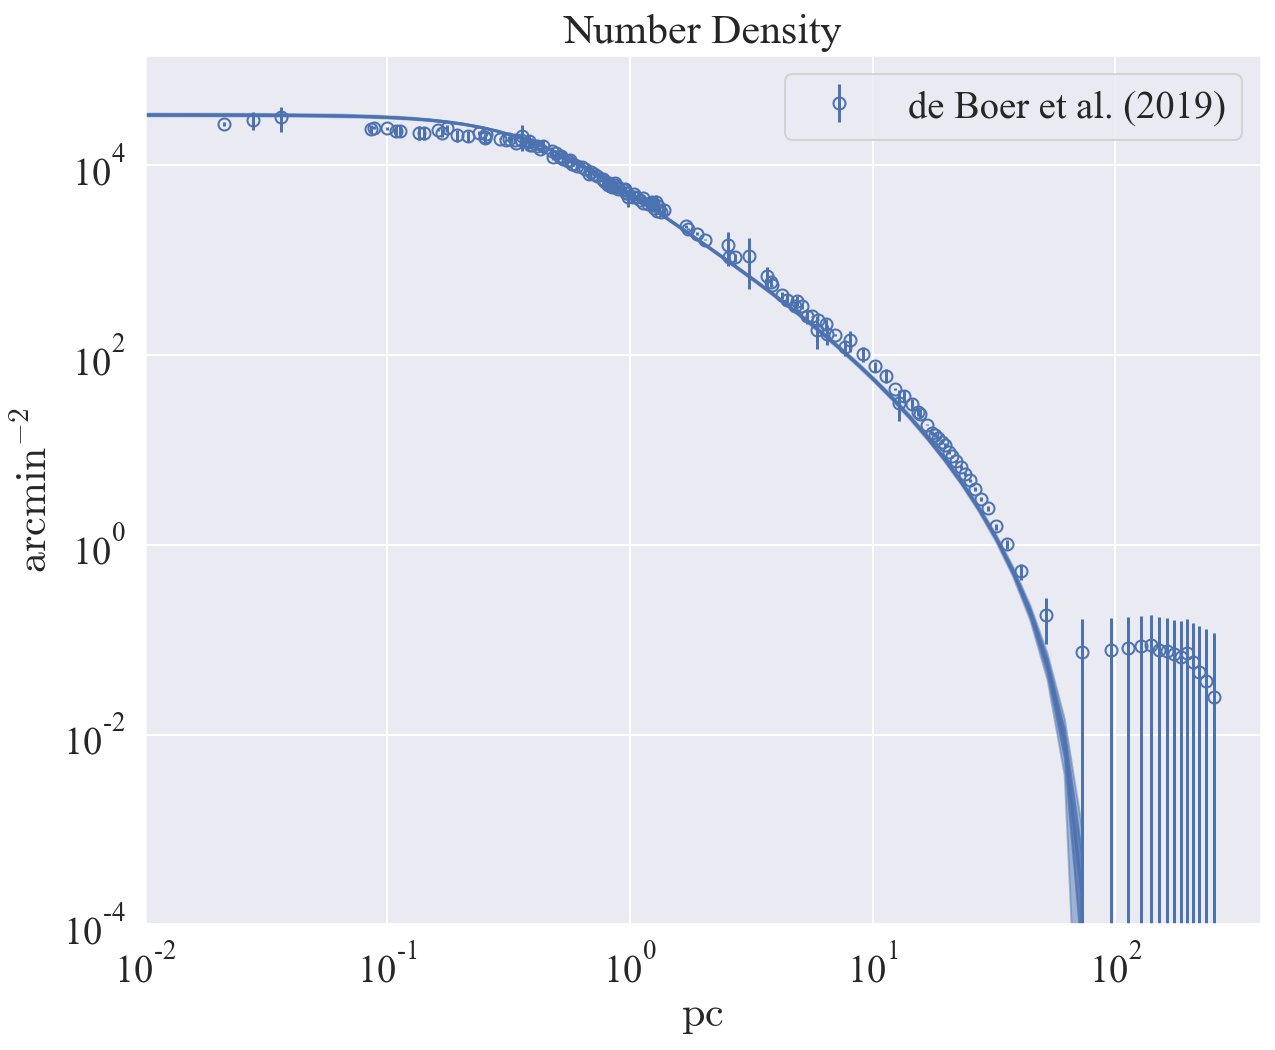

In [45]:
# plot  numdens
fig = plt.figure(figsize=(10, 8))
civiz.plot_number_density(fig=fig, rescaled=True)

plt.legend()
fig.legends = []

plt.xlim(1e-2, 10**2.6)
# plt.ylim(1e1,1e6)

fig.savefig('numdens.png', bbox_inches='tight', dpi=300)

plt.show()

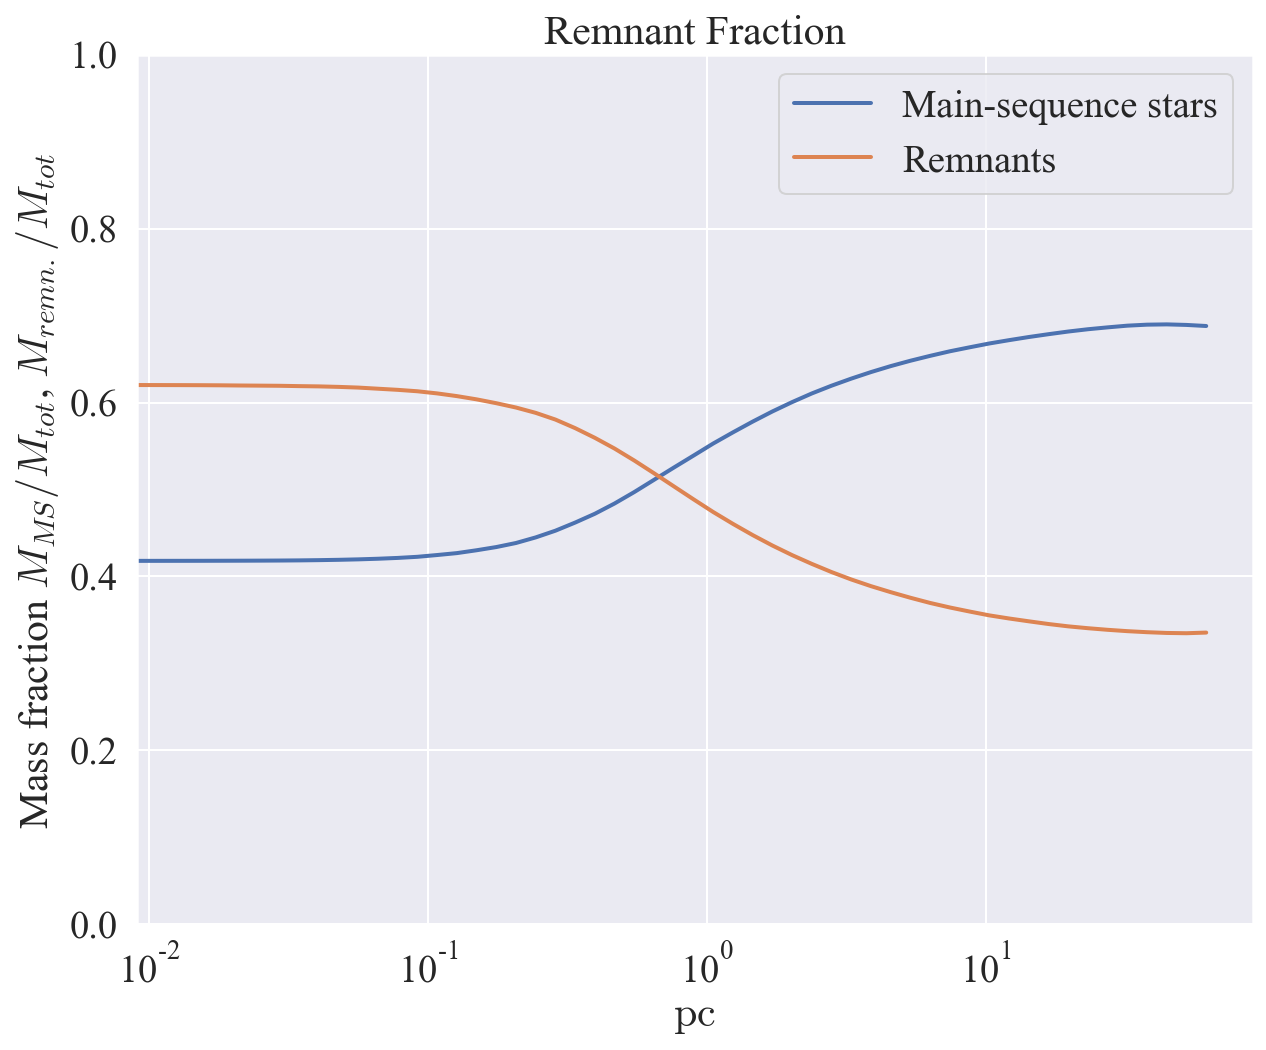

In [46]:
# plot
fig = plt.figure(figsize=(10, 8))
civiz.plot_remnant_fraction(fig=fig)

plt.legend()
fig.legends = []

fig.savefig('remnant_frac.png', bbox_inches='tight', dpi=300)


plt.show()